In [1]:
import pandas as pd
'''
Aim is to design a decision tree classifier based on the fact if the
solver produces an output or not
'''
summary = pd.read_csv('/home/skapoor/Thesis/gmwcs-solver/outputs/solver/summary_100.csv')
summary.fillna(0, inplace=True)

In [2]:
summary.sort_values(['Features_preserved_per', 'Output_graph_posedge'], ascending=[False, False])
filtered = summary[(summary.Features_preserved_per>0) & (summary.Output_graph_posedge>0) & (summary.Output_Graph_edges>4) ]
#the filtered valuesa are actually what we want
# the decision tree will be first run on the basis of the first six columns and the targets are number of edges in binarized

In [3]:
features = summary.iloc[:, :6] #first columns which are important, X values
y = summary.Features_preserved_per>0

In [4]:
# encode all the categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features.Feature_type = le.fit_transform(features.Feature_type)
c1 = list(le.classes_)
features.Target = le.fit_transform(features.Target)
c2 = list(le.classes_)
features.Edge = le.fit_transform(features.Edge)
c3 = list(le.classes_)
features.Node_weights = le.fit_transform(features.Node_weights)
c4 = list(le.classes_)

In [5]:
#Need to know the number of unique values in the column in order to know what name to assign

In [6]:
# importing one hot encoder from sklearn
# There are changes in OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# creating one hot encoder object with categorical feature 0
# indicating the first column
columnTransformer = ColumnTransformer([('encoder',
										OneHotEncoder(),
										[0,2,3,4])],
									remainder='passthrough')

data = np.array(columnTransformer.fit_transform(features), dtype = np.str)

In [7]:
c1.extend(['Factor'])
c1.extend(c2)
c1.extend(c3)
c1.extend(c4)
c1.append('Subtracted_value')

In [8]:
data = pd.DataFrame(data, columns=c1)

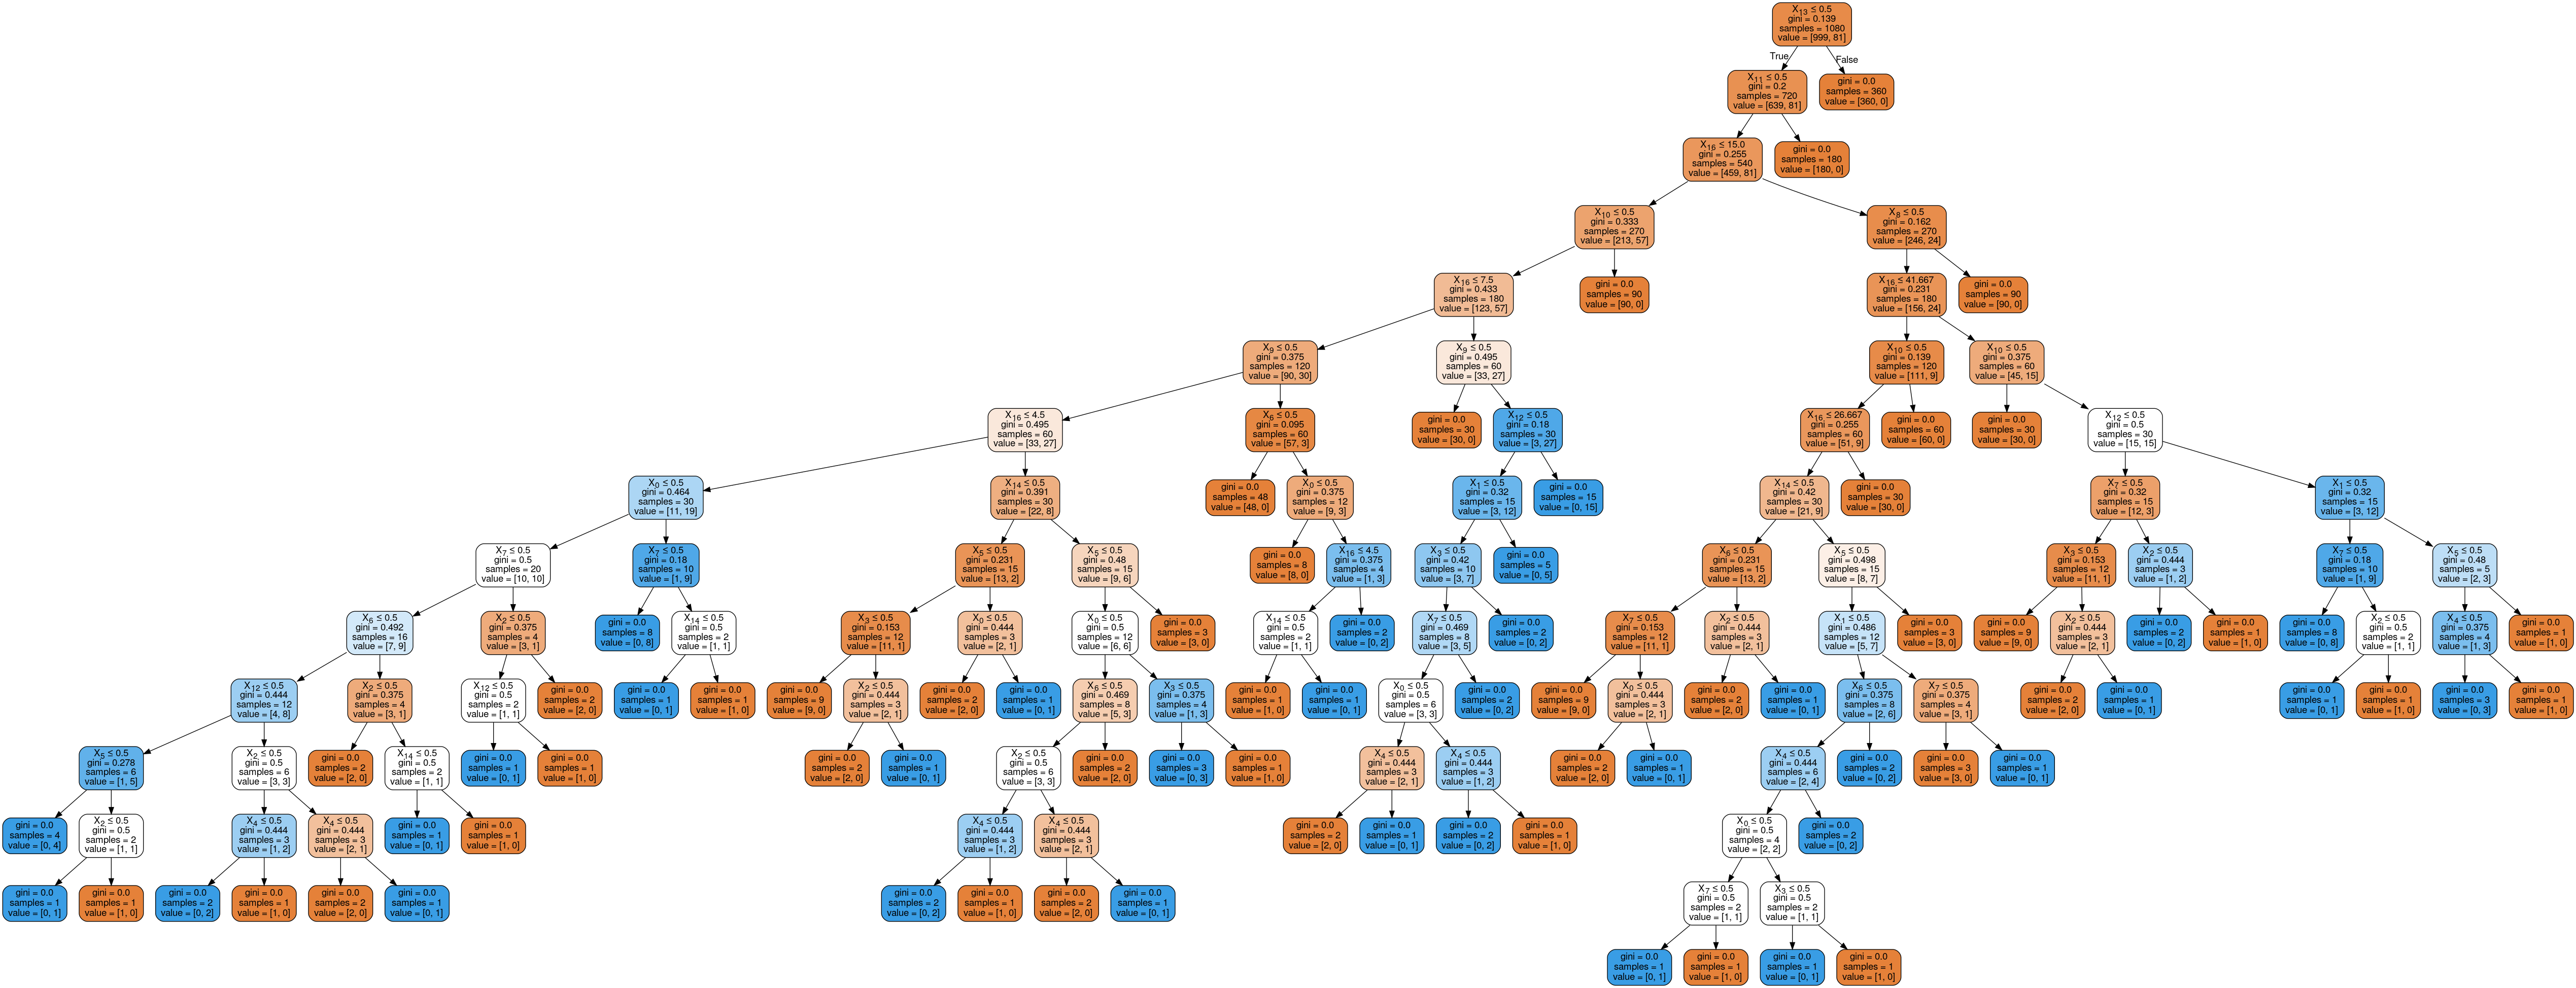

In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dtree=DecisionTreeClassifier()
dtree.fit(data,y)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

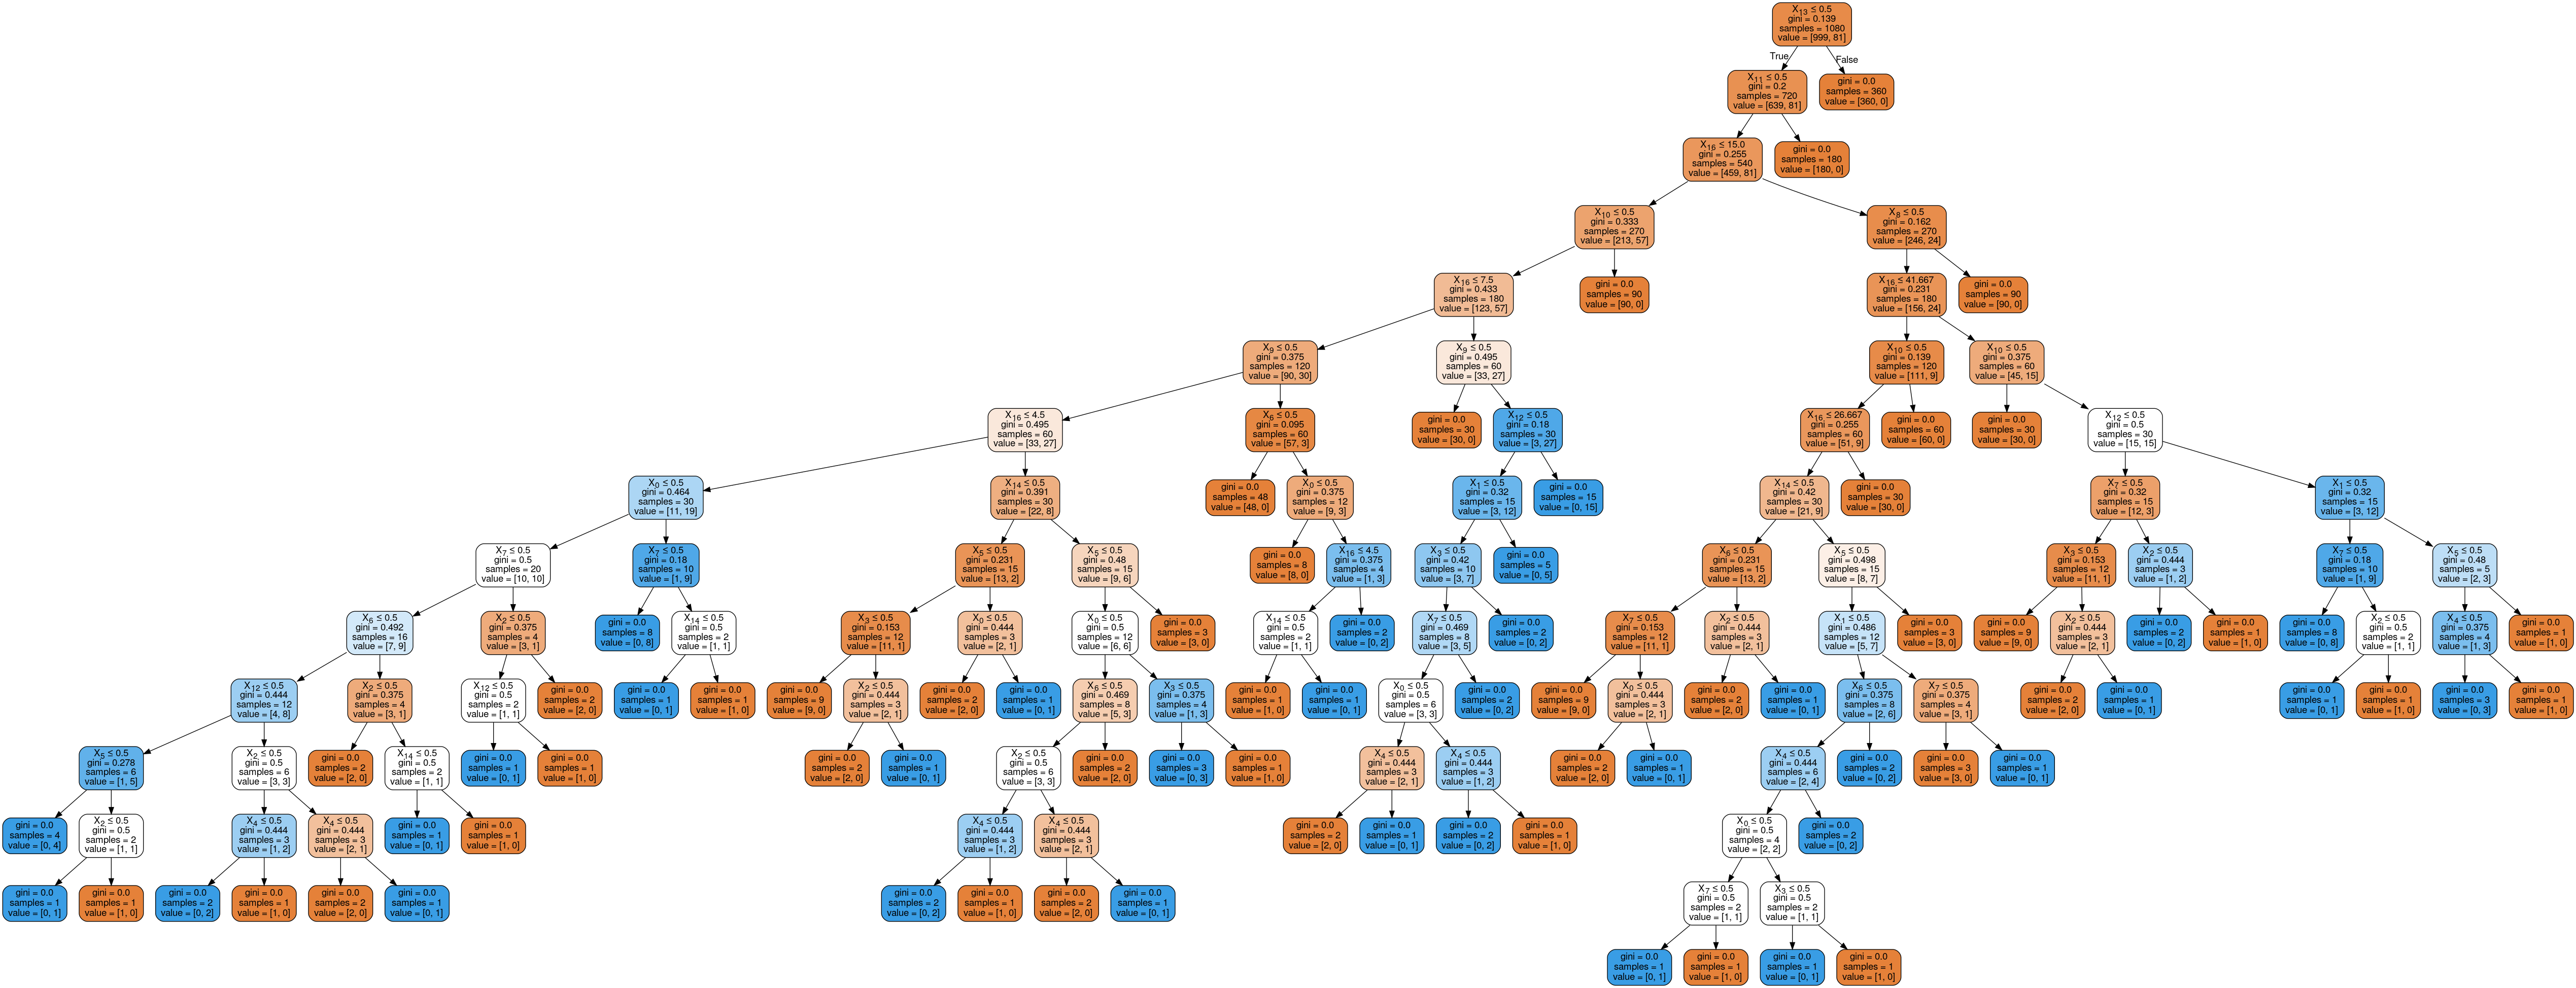

In [19]:
Image(graph.create_png())

In [22]:
export_graphviz(dtree, out_file='treepic.dot', feature_names=data.columns)